# Chapter 9 Exercises

## 9.1

<IPython.core.display.Javascript object>


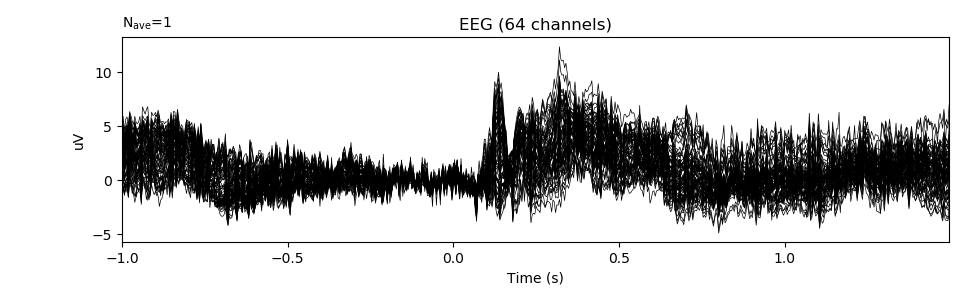

<IPython.core.display.Javascript object>


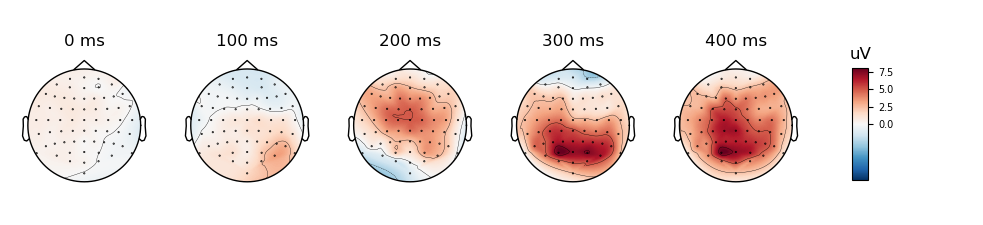

In [1]:
import numpy as np
import scipy.io
import mne
%matplotlib notebook

data = scipy.io.loadmat('sampleEEGdata')

# extract various information from the input file
EEGdata = data["EEG"][0, 0]["data"] * 1e-6    # multiplying by 1e-6 puts data in units of volts
EEGsrate = float(data["EEG"][0, 0]["srate"][0])
EEGnumtrials = data["EEG"][0, 0]["trials"][0, 0]
EEGchanlocs = data["EEG"][0, 0]["chanlocs"][0]
EEGcoords = np.concatenate(EEGchanlocs[["Y", "X", "Z"]].tolist()).ravel()
EEGcoords = np.reshape(EEGcoords, [len(EEGchanlocs), 3])
EEGcoords[:, [0]] = -EEGcoords[:, [0]]
EEGchanlabels = np.concatenate(data["EEG"][0, 0]["chanlocs"][0]["labels"]).tolist()
EEGtmin = data["EEG"][0, 0]["xmin"][0, 0]

# create montage for MNE
dig_ch_pos = dict(zip(EEGchanlabels, EEGcoords))
montage = mne.channels.DigMontage(dig_ch_pos=dig_ch_pos)

# create MNE Info object
info = mne.create_info(EEGchanlabels, EEGsrate, ch_types='eeg', montage=montage)

# compute ERP by averaging across trials
ERP = EEGdata.mean(axis=2)

# create MNE Evoked object for the ERP
evoked_array = mne.EvokedArray(ERP, info, tmin=EEGtmin)

# plot ERP
_ = evoked_array.plot(time_unit='s')

# plot topographical maps at selected times
_ = evoked_array.plot_topomap(
    times=[0, 0.1, 0.2, 0.3, 0.4],
    time_unit='ms',
    average=0.04)

## 9.2

<IPython.core.display.Javascript object>


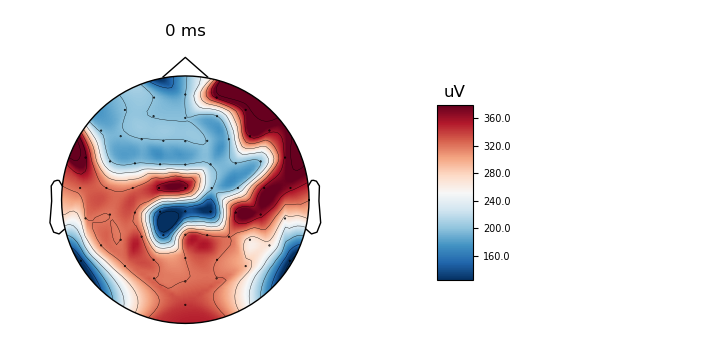

In [3]:
# extract the list of times corresponding to each sample
EEGtimes = data["EEG"][0, 0]["times"][0]


# computes the index of the maximum of an array between the indices start and end
def peak(channel, start, end):
    return np.min(np.argmax(channel[start:end])) + start


# find the indices of time=0ms and time=400ms
indexof_0ms = np.min(np.where(EEGtimes >= 0))
indexof_400ms = np.min(np.where(EEGtimes >= 400))

# compute the times for peak values between 0ms and 400ms for each electrode
peak_locs = np.apply_along_axis(peak, 1, ERP, indexof_0ms, indexof_400ms)
peaks = EEGtimes[peak_locs].reshape([len(EEGchanlabels), 1])

# create MNE Evoked object containing the peaks
evoked_array = mne.EvokedArray(peaks, info)

# plot a topographical map with colors corresponding to p
_ = evoked_array.plot_topomap(
    times=[0],
    time_unit='ms',
    vmin=np.min(peaks),
    vmax=np.max(peaks),
    scalings=dict(eeg=1),
    cmap='RdBu_r')


---
Antonio R. Vargas

9 October 2018